In [1]:
import pickle
from preprocess import *


pd.set_option('display.max_columns', None)

In [2]:
with open('datas/attack.pkl', 'rb') as f:
    attack_df = pickle.load(f)

In [3]:
attack_df = preprocess_df(attack_df)
attack_df.tail()

,market_value,app,conceded_goals,clean_sheets,yellow_card,second_yell,red_card,age,height,position,foot,club,outfitter,cup,Tackles,Inter,Fouls,Offsides,Clear,Drbed,Blocks,OwnG,Rating,Goals,Assists,SpG,Fouled,Off,Disp,UnsTch,Drb,KeyP,AvgP,PS,Crosses,LongB,ThrB,AerialsWon,MotM,period,total_out
601,1800000,10,0.100000,0.0,0.100000,0.0,0.1,26,177,Centre-Forward,right,0,adidas,0,0.2,0.1,0.8,0.0,0.0,0.5,0.0,0.0,5.95,0.000000,0.0,0.4,0.3,0.0,0.7,1.2,0.4,0.5,10.2,75.9,0.1,0.4,0.0,1.0,0.0,1.8,0.1
602,2700000,33,0.272727,0.0,0.060606,0.0,0.0,24,175,Centre-Forward,right,0,Puma,3,0.4,0.1,0.6,0.0,0.2,0.2,0.0,0.0,6.45,0.272727,0.0,0.9,1.2,0.5,0.9,2.0,0.8,0.3,8.8,77.5,0.0,0.3,0.0,0.5,0.0,3.0,0.0
603,1080000,19,0.000000,0.0,0.105263,0.0,0.0,33,182,Centre-Forward,right,0,Puma,0,0.4,0.3,0.6,0.0,0.2,0.3,0.0,0.0,6.05,0.000000,0.0,0.5,0.8,0.2,0.5,1.4,0.1,0.2,7.4,74.3,0.1,0.1,0.0,0.7,0.0,1.0,0.0
604,900000,13,0.000000,0.0,0.000000,0.0,0.0,26,192,Centre-Forward,right,0,Puma,1,0.2,0.0,0.2,0.0,0.2,0.4,0.0,0.0,6.06,0.000000,0.0,0.6,0.2,0.0,0.2,1.0,0.2,0.2,5.1,57.6,0.0,0.0,0.0,0.9,0.0,4.0,0.0
605,315000,1,0.000000,0.0,0.000000,0.0,0.0,23,185,Centre-Forward,right,0,Puma,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.17,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,50.0,0.0,0.0,0.0,1.0,0.0,5.2,0.0


In [4]:
model_df = pd.get_dummies(attack_df, columns=['position', 'foot', 'outfitter'])

In [6]:
from sklearn.model_selection import train_test_split


dfX0 = model_df.loc[:, 'app':]
dfy = model_df['market_value']

train_X, test_X, train_y, test_y = train_test_split(dfX0, dfy, test_size=0.3, random_state=3)
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(424, 48) (424,) (182, 48) (182,)


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
model_lm = LinearRegression(fit_intercept=True).fit(train_X, train_y)
pred_lm = model_lm.predict(test_X)

print(mean_squared_error(test_y, pred_lm))
print(np.sqrt(mean_squared_error(test_y, pred_lm)))
print(r2_score(test_y, pred_lm))

194452715954871.66
13944630.362790965
0.5598183057492543


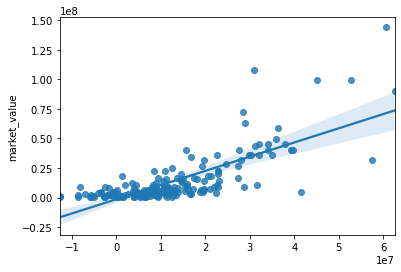

In [14]:
sns.regplot(x=pred_lm, y=test_y);

In [13]:
f = np.polyfit(pred_lm, test_y, deg=1)
f[0]

1.2001409798026657

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [16]:
ss = StandardScaler().fit(dfX0.loc[:, "app":"total_out"].values)
mm = MinMaxScaler().fit(dfX0.loc[:, "app":"total_out"].values)
rb = RobustScaler().fit(dfX0.loc[:, "app":"total_out"].values)

ss_values = ss.transform(dfX0.loc[:, "app":"total_out"].values)
mm_values = mm.transform(dfX0.loc[:, "app":"total_out"].values)
rb_values = rb.transform(dfX0.loc[:, "app":"total_out"].values)

ss_dfX0 = np.hstack([ss_values , dfX0.loc[:, "position_Centre-Forward":].values])
mm_dfX0 = np.hstack([mm_values , dfX0.loc[:, "position_Centre-Forward":].values])
rb_dfX0 = np.hstack([rb_values , dfX0.loc[:, "position_Centre-Forward":].values])

In [17]:
train_X, test_X, train_y, test_y = train_test_split(ss_dfX0, dfy, test_size=0.3, random_state=3)

ss_model = LinearRegression(fit_intercept=True).fit(train_X, train_y)
pred_ss = ss_model.predict(test_X)

print(mean_squared_error(test_y, pred_ss))
print(np.sqrt(mean_squared_error(test_y, pred_ss)))
print(r2_score(test_y, pred_ss))

194452715954871.8
13944630.36279097
0.5598183057492538


In [18]:
train_X, test_X, train_y, test_y = train_test_split(mm_dfX0, dfy, test_size=0.3, random_state=3)

mm_model = LinearRegression(fit_intercept=True).fit(train_X, train_y)
pred_mm = mm_model.predict(test_X)

print(mean_squared_error(test_y, pred_mm))
print(np.sqrt(mean_squared_error(test_y, pred_mm)))
print(r2_score(test_y, pred_mm))

454681020908745.5
21323250.711576447
-0.02925927850613874


In [19]:
train_X, test_X, train_y, test_y = train_test_split(rb_dfX0, dfy, test_size=0.3, random_state=3)

rb_model = LinearRegression(fit_intercept=True).fit(train_X, train_y)
pred_rb = rb_model.predict(test_X)

print(mean_squared_error(test_y, pred_rb))
print(np.sqrt(mean_squared_error(test_y, pred_rb)))
print(r2_score(test_y, pred_rb))

194452715954871.66
13944630.362790965
0.5598183057492543


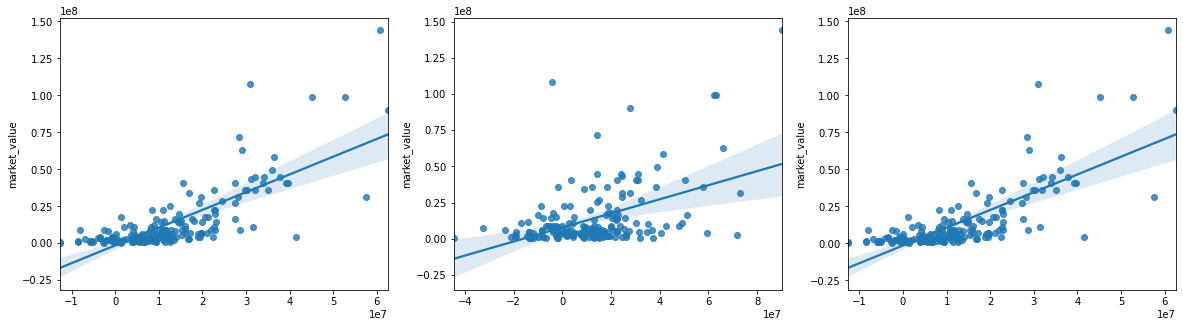

In [21]:
plt.figure(figsize=(20, 5))

plt.subplot(131)
sns.regplot(x=pred_ss, y=test_y)

plt.subplot(132)
sns.regplot(x=pred_mm, y=test_y)

plt.subplot(133)
sns.regplot(x=pred_rb, y=test_y)

plt.show()

In [22]:
f1 = np.polyfit(pred_ss, test_y, deg=1)
f2 = np.polyfit(pred_mm, test_y, deg=1)
f3 = np.polyfit(pred_rb, test_y, deg=1)

print(f1[0], f2[0], f3[0])

1.200140979802672 0.4866415903716376 1.200140979802671


In [23]:
log_dfy = np.log1p(model_df['market_value'])

train_X, test_X, train_y, test_y = train_test_split(ss_dfX0, log_dfy, test_size=0.3, random_state=3)
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(424, 48) (424,) (182, 48) (182,)


In [24]:
model_log = LinearRegression(fit_intercept=True).fit(train_X, train_y)
pred_log = model_log.predict(test_X)

print(mean_squared_error(test_y, pred_log))
print(np.sqrt(mean_squared_error(test_y, pred_log)))
print(r2_score(test_y, pred_log))

0.5480264932553149
0.7402881150304352
0.6854655222661425


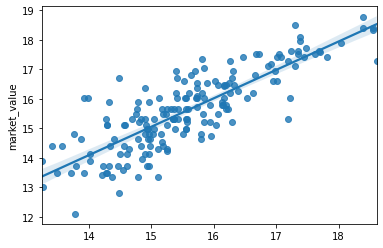

In [25]:
sns.regplot(x=pred_log, y=test_y);

In [26]:
f = np.polyfit(pred_log, test_y, deg=1)
f[0]

0.9623642728168177

In [29]:
print("inverse log한 rmse : ", np.sqrt(np.sum((((np.exp(test_y) -1) - (np.exp(pred_log) -1))**2)) / len(test_y)))

inverse log한 rmse :  12240363.27914449


In [30]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
train_X, test_X, train_y, test_y = train_test_split(ss_dfX0, dfy, test_size=0.3, random_state=3)

rf_model = RandomForestRegressor().fit(train_X, train_y)
pred_rf = rf_model.predict(test_X)

print(mean_squared_error(test_y, pred_rf))
print(np.sqrt(mean_squared_error(test_y, pred_rf)))
print(r2_score(test_y, pred_rf))

175187197735590.66
13235830.073538668
0.6034295683060078


In [34]:
train_X, test_X, train_y, test_y = train_test_split(ss_dfX0, log_dfy, test_size=0.3, random_state=3)

rf_log_model = RandomForestRegressor().fit(train_X, train_y)
pred_rf_log = rf_log_model.predict(test_X)

print(mean_squared_error(test_y, pred_rf_log))
print(np.sqrt(mean_squared_error(test_y, pred_rf_log)))
print(r2_score(test_y, pred_rf_log))

0.5936066041108575
0.7704586972128081
0.6593052607834549


In [35]:
from sklearn.model_selection import GridSearchCV

In [114]:
random_params = {'bootstrap': [True, False],
 'max_depth': [1,3,5,7,9],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800]}

result = GridSearchCV(
    RandomForestRegressor(),
    param_grid=random_params,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=3)

result.fit(train_X, train_y)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-1.022 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-1.316 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.894 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-1.253 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-1.205 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=-1.022 total time=   0.2s
[CV 2/5] END boots

[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600;, score=-1.196 total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800;, score=-1.019 total time=   0.5s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800;, score=-1.323 total time=   0.5s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800;, score=-0.900 total time=   0.5s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800;, score=-1.254 total time=   0.5s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800;, score=-1.207 total time=   0.5s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_lea

[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=-1.265 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=-1.197 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600;, score=-1.026 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600;, score=-1.319 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600;, score=-0.907 total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600;, score=-1.260 total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_lea

[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-1.268 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=-1.203 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=-1.032 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=-1.326 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=-0.902 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=-1.258 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_lea

[CV 3/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800;, score=-0.965 total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800;, score=-1.367 total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800;, score=-1.290 total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-1.125 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-1.460 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.981 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1

[CV 2/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600;, score=-1.454 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600;, score=-0.966 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600;, score=-1.376 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600;, score=-1.287 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800;, score=-1.110 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800;, score=-1.469 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, m

[CV 1/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=-1.109 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=-1.466 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=-0.969 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=-1.366 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=-1.283 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600;, score=-1.123 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, m

[CV 5/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800;, score=-0.852 total time=   0.8s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.721 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.909 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.623 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.813 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.836 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, m

[CV 4/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600;, score=-0.822 total time=   0.6s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600;, score=-0.851 total time=   0.6s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800;, score=-0.714 total time=   0.8s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800;, score=-0.915 total time=   0.8s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800;, score=-0.631 total time=   0.8s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800;, score=-0.818 total time=   0.8s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, m

[CV 3/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=-0.612 total time=   0.4s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=-0.823 total time=   0.4s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=-0.847 total time=   0.4s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600;, score=-0.723 total time=   0.6s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600;, score=-0.915 total time=   0.6s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600;, score=-0.598 total time=   0.6s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, m

[CV 3/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.670 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.971 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.986 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=-0.835 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=-1.117 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=-0.664 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, m

[CV 2/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800;, score=-1.119 total time=   0.4s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800;, score=-0.677 total time=   0.4s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800;, score=-0.958 total time=   0.4s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800;, score=-0.971 total time=   0.4s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.802 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-1.109 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=

[CV 1/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600;, score=-0.816 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600;, score=-1.100 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600;, score=-0.677 total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600;, score=-0.959 total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600;, score=-0.968 total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800;, score=-0.830 total time=   0.4s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_lea

[CV 1/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=-0.826 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=-1.095 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=-0.677 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=-0.949 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=-0.979 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600;, score=-0.835 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_lea

[CV 5/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800;, score=-0.727 total time=   1.1s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.680 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.815 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.554 total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.763 total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.743 total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf

[CV 4/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600;, score=-0.749 total time=   0.8s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600;, score=-0.728 total time=   0.8s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800;, score=-0.672 total time=   1.1s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800;, score=-0.802 total time=   1.1s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800;, score=-0.569 total time=   1.1s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800;, score=-0.753 total time=   1.1s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, m

[CV 3/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=-0.556 total time=   0.5s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=-0.752 total time=   0.5s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=-0.742 total time=   0.5s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600;, score=-0.696 total time=   0.8s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600;, score=-0.802 total time=   0.8s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600;, score=-0.564 total time=   0.8s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, m

[CV 2/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.954 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.592 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.875 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.863 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=-0.758 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=-0.969 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, m

[CV 1/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800;, score=-0.756 total time=   0.4s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800;, score=-0.971 total time=   0.4s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800;, score=-0.584 total time=   0.4s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800;, score=-0.858 total time=   0.4s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800;, score=-0.868 total time=   0.4s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.757 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, m

[CV 5/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=-0.869 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600;, score=-0.756 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600;, score=-0.980 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600;, score=-0.592 total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600;, score=-0.846 total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600;, score=-0.874 total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, m

[CV 4/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.740 total time=   0.4s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.680 total time=   0.4s
[CV 1/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=-0.659 total time=   0.7s
[CV 2/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=-0.780 total time=   0.7s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=-0.563 total time=   0.7s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=-0.736 total time=   0.7s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, m

[CV 3/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800;, score=-0.556 total time=   1.2s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800;, score=-0.741 total time=   1.2s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800;, score=-0.701 total time=   1.2s
[CV 1/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.681 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.781 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.552 total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2

[CV 2/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600;, score=-0.773 total time=   0.9s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600;, score=-0.556 total time=   0.9s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600;, score=-0.738 total time=   0.9s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600;, score=-0.719 total time=   0.9s
[CV 1/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800;, score=-0.676 total time=   1.2s
[CV 2/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800;, score=-0.777 total time=   1.3s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_lea

[CV 1/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=-0.690 total time=   0.6s
[CV 2/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=-0.800 total time=   0.6s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=-0.555 total time=   0.6s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=-0.739 total time=   0.6s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=-0.724 total time=   0.6s
[CV 1/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600;, score=-0.684 total time=   0.9s
[CV 2/5] END bootstrap=True, max_depth=7, max_features=auto, min_samples_lea

[CV 5/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800;, score=-0.805 total time=   0.5s
[CV 1/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.729 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.934 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.572 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.825 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.813 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf

[CV 4/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600;, score=-0.824 total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600;, score=-0.816 total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800;, score=-0.727 total time=   0.4s
[CV 2/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800;, score=-0.930 total time=   0.4s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800;, score=-0.559 total time=   0.5s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800;, score=-0.827 total time=   0.5s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=2, m

[CV 3/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=-0.583 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=-0.832 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=-0.829 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600;, score=-0.753 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600;, score=-0.954 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600;, score=-0.571 total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=4, m

[CV 2/5] END bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.792 total time=   0.4s
[CV 3/5] END bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.539 total time=   0.4s
[CV 4/5] END bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.742 total time=   0.4s
[CV 5/5] END bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.706 total time=   0.4s
[CV 1/5] END bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=-0.674 total time=   0.7s
[CV 2/5] END bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=-0.783 total time=   0.8s
[CV 3/5] END bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=1, m

[CV 1/5] END bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800;, score=-0.668 total time=   1.4s
[CV 2/5] END bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800;, score=-0.771 total time=   1.4s
[CV 3/5] END bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800;, score=-0.559 total time=   1.5s
[CV 4/5] END bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800;, score=-0.741 total time=   1.5s
[CV 5/5] END bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800;, score=-0.695 total time=   1.5s
[CV 1/5] END bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.662 total time=   0.4s
[CV 2/5] END bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=2, m

[CV 5/5] END bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=400;, score=-0.721 total time=   0.6s
[CV 1/5] END bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600;, score=-0.680 total time=   1.0s
[CV 2/5] END bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600;, score=-0.788 total time=   1.0s
[CV 3/5] END bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600;, score=-0.558 total time=   1.0s
[CV 4/5] END bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600;, score=-0.752 total time=   1.0s
[CV 5/5] END bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600;, score=-0.718 total time=   1.0s
[CV 1/5] END bootstrap=True, max_depth=9, max_features=auto, min_samples_leaf=4, m

[CV 4/5] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.812 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-0.811 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=-0.724 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=-0.902 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=-0.547 total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=-0.829 total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, m

[CV 3/5] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800;, score=-0.566 total time=   0.5s
[CV 4/5] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800;, score=-0.827 total time=   0.5s
[CV 5/5] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800;, score=-0.819 total time=   0.5s
[CV 1/5] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.725 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.918 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.552 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2

[CV 2/5] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600;, score=-0.917 total time=   0.4s
[CV 3/5] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600;, score=-0.575 total time=   0.4s
[CV 4/5] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600;, score=-0.822 total time=   0.4s
[CV 5/5] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600;, score=-0.840 total time=   0.4s
[CV 1/5] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800;, score=-0.742 total time=   0.5s
[CV 2/5] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800;, score=-0.926 total time=   0.5s
[CV 3/5] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_lea

[CV 1/5] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=-0.750 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=-0.942 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=-0.583 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=-0.823 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=-0.839 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600;, score=-0.748 total time=   0.4s
[CV 2/5] END bootstrap=True, max_depth=9, max_features=sqrt, min_samples_lea

[CV 5/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800;, score=-1.250 total time=   0.5s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-1.249 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-1.508 total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-1.031 total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-1.538 total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-1.250 total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=auto, min_sampl

[CV 4/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600;, score=-1.538 total time=   0.3s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600;, score=-1.250 total time=   0.3s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800;, score=-1.249 total time=   0.4s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800;, score=-1.508 total time=   0.5s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800;, score=-1.031 total time=   0.5s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800;, score=-1.538 total time=   0.5s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_le

[CV 3/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=-1.031 total time=   0.2s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=-1.538 total time=   0.2s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=-1.250 total time=   0.2s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600;, score=-1.249 total time=   0.3s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600;, score=-1.508 total time=   0.3s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600;, score=-1.031 total time=   0.3s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_le

[CV 4/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-1.372 total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-1.273 total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=-1.125 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=-1.463 total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=-0.979 total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=-1.381 total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_le

[CV 3/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800;, score=-0.980 total time=   0.2s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800;, score=-1.385 total time=   0.2s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=800;, score=-1.293 total time=   0.3s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-1.131 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-1.448 total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.975 total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_le

[CV 3/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600;, score=-0.984 total time=   0.2s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600;, score=-1.387 total time=   0.2s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600;, score=-1.298 total time=   0.2s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800;, score=-1.142 total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800;, score=-1.470 total time=   0.3s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800;, score=-0.972 total time=   0.3s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_le

[CV 2/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=-1.257 total time=   0.5s
[CV 3/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=-1.029 total time=   0.5s
[CV 4/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=-1.237 total time=   0.5s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=-1.196 total time=   0.5s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600;, score=-0.953 total time=   0.7s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600;, score=-1.257 total time=   0.7s
[CV 3/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_le

[CV 1/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.953 total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-1.257 total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-1.029 total time=   0.2s
[CV 4/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-1.237 total time=   0.2s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-1.196 total time=   0.2s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=-0.953 total time=   0.5s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_le

[CV 5/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600;, score=-1.196 total time=   0.7s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800;, score=-0.953 total time=   0.9s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800;, score=-1.257 total time=   0.9s
[CV 3/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800;, score=-1.029 total time=   0.9s
[CV 4/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800;, score=-1.237 total time=   0.9s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800;, score=-1.196 total time=   0.9s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=auto, min_samp

[CV 4/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=-1.237 total time=   0.5s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=-1.052 total time=   0.5s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600;, score=-0.953 total time=   0.7s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600;, score=-1.257 total time=   0.7s
[CV 3/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600;, score=-1.029 total time=   0.7s
[CV 4/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600;, score=-1.237 total time=   0.7s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=auto, min_samp

[CV 3/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.677 total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.949 total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.975 total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=-0.818 total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=-1.101 total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=-0.671 total time=   0.2s
[CV 4/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samp

[CV 2/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800;, score=-1.085 total time=   0.3s
[CV 3/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800;, score=-0.668 total time=   0.3s
[CV 4/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800;, score=-0.951 total time=   0.3s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800;, score=-0.960 total time=   0.3s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.814 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-1.092 total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_

[CV 1/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600;, score=-0.816 total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600;, score=-1.084 total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600;, score=-0.682 total time=   0.2s
[CV 4/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600;, score=-0.958 total time=   0.2s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600;, score=-0.960 total time=   0.2s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800;, score=-0.813 total time=   0.3s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_le

[CV 5/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-1.251 total time=   0.3s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=-1.140 total time=   0.7s
[CV 2/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=-1.109 total time=   0.7s
[CV 3/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=-1.163 total time=   0.7s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=-1.153 total time=   0.7s
[CV 5/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=-1.269 total time=   0.7s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_le

[CV 4/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800;, score=-1.151 total time=   1.4s
[CV 5/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=800;, score=-1.180 total time=   1.4s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-1.138 total time=   0.4s
[CV 2/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-1.115 total time=   0.4s
[CV 3/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-1.133 total time=   0.4s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-1.150 total time=   0.4s
[CV 5/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_le

[CV 3/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600;, score=-1.142 total time=   1.0s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600;, score=-1.387 total time=   1.0s
[CV 5/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=600;, score=-1.121 total time=   1.0s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800;, score=-1.196 total time=   1.4s
[CV 2/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800;, score=-1.249 total time=   1.4s
[CV 3/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800;, score=-1.142 total time=   1.4s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_le

[CV 3/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=-0.594 total time=   0.2s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=-0.839 total time=   0.2s
[CV 5/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=-0.830 total time=   0.2s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600;, score=-0.744 total time=   0.3s
[CV 2/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600;, score=-0.938 total time=   0.3s
[CV 3/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600;, score=-0.591 total time=   0.3s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_le

[CV 3/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.586 total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.835 total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-0.831 total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=-0.735 total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=-0.934 total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=-0.592 total time=   0.2s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_le

[CV 2/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800;, score=-0.948 total time=   0.4s
[CV 3/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800;, score=-0.582 total time=   0.4s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800;, score=-0.835 total time=   0.4s
[CV 5/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800;, score=-0.834 total time=   0.4s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-0.729 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-0.943 total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_sample

[CV 1/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600;, score=-0.742 total time=   0.3s
[CV 2/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600;, score=-0.943 total time=   0.3s
[CV 3/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600;, score=-0.586 total time=   0.3s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600;, score=-0.829 total time=   0.3s
[CV 5/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600;, score=-0.841 total time=   0.3s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800;, score=-0.754 total time=   0.4s
[CV 2/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samp

[CV 5/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-1.298 total time=   0.4s
[CV 1/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=-1.374 total time=   0.9s
[CV 2/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=-1.233 total time=   0.9s
[CV 3/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=-1.134 total time=   0.9s
[CV 4/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=-1.358 total time=   0.9s
[CV 5/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=-1.294 total time=   0.9s
[CV 1/5] END bootstrap=False, max_depth=7, max_features=auto, min_samp

[CV 4/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800;, score=-1.369 total time=   1.8s
[CV 5/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800;, score=-1.362 total time=   1.8s
[CV 1/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-1.352 total time=   0.4s
[CV 2/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-1.232 total time=   0.4s
[CV 3/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-1.050 total time=   0.4s
[CV 4/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-1.345 total time=   0.4s
[CV 5/5] END bootstrap=False, max_depth=7, max_features=auto, min_sample

[CV 3/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600;, score=-1.181 total time=   1.3s
[CV 4/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600;, score=-1.428 total time=   1.3s
[CV 5/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600;, score=-1.191 total time=   1.3s
[CV 1/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800;, score=-1.293 total time=   1.7s
[CV 2/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800;, score=-1.336 total time=   1.7s
[CV 3/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=800;, score=-1.181 total time=   1.7s
[CV 4/5] END bootstrap=False, max_depth=7, max_features=auto, min_samples_le

[CV 2/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=-0.863 total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=-0.553 total time=   0.2s
[CV 4/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=-0.813 total time=   0.2s
[CV 5/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400;, score=-0.767 total time=   0.2s
[CV 1/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600;, score=-0.719 total time=   0.3s
[CV 2/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600;, score=-0.893 total time=   0.3s
[CV 3/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_le

[CV 2/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.921 total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.555 total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.791 total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=-0.781 total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=-0.728 total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=-0.880 total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_le

[CV 1/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800;, score=-0.731 total time=   0.4s
[CV 2/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800;, score=-0.900 total time=   0.4s
[CV 3/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800;, score=-0.557 total time=   0.4s
[CV 4/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800;, score=-0.806 total time=   0.4s
[CV 5/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800;, score=-0.795 total time=   0.4s
[CV 1/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=-0.733 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_le

[CV 5/5] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=-1.351 total time=   1.1s
[CV 1/5] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600;, score=-1.240 total time=   1.7s
[CV 2/5] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600;, score=-1.462 total time=   1.7s
[CV 3/5] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600;, score=-1.431 total time=   1.7s
[CV 4/5] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600;, score=-1.394 total time=   1.7s
[CV 5/5] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600;, score=-1.355 total time=   1.7s
[CV 1/5] END bootstrap=False, max_depth=9, max_features=auto, min_samples_le

[CV 4/5] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-1.563 total time=   0.5s
[CV 5/5] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=-1.380 total time=   0.5s
[CV 1/5] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=-1.239 total time=   1.1s
[CV 2/5] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=-1.503 total time=   1.1s
[CV 3/5] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=-1.302 total time=   1.1s
[CV 4/5] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=-1.563 total time=   1.1s
[CV 5/5] END bootstrap=False, max_depth=9, max_features=auto, min_samples_le

[CV 3/5] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800;, score=-1.191 total time=   2.0s
[CV 4/5] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800;, score=-1.502 total time=   2.0s
[CV 5/5] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=800;, score=-1.359 total time=   2.0s
[CV 1/5] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-1.347 total time=   0.5s
[CV 2/5] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-1.398 total time=   0.5s
[CV 3/5] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=-1.283 total time=   0.5s
[CV 4/5] END bootstrap=False, max_depth=9, max_features=auto, min_samples

[CV 2/5] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600;, score=-1.372 total time=   1.4s
[CV 3/5] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600;, score=-1.244 total time=   1.4s
[CV 4/5] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600;, score=-1.445 total time=   1.3s
[CV 5/5] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600;, score=-1.162 total time=   1.4s
[CV 1/5] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800;, score=-1.400 total time=   1.8s
[CV 2/5] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=800;, score=-1.373 total time=   1.8s
[CV 3/5] END bootstrap=False, max_depth=9, max_features=auto, min_samp

[CV 1/5] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=-0.709 total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=-0.871 total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=-0.554 total time=   0.2s
[CV 4/5] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=-0.785 total time=   0.2s
[CV 5/5] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=-0.783 total time=   0.2s
[CV 1/5] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600;, score=-0.716 total time=   0.3s
[CV 2/5] END bootstrap=False, max_depth=9, max_features=sqrt, min_samp

[CV 5/5] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800;, score=-0.769 total time=   0.5s
[CV 1/5] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.731 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.880 total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.552 total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.793 total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=-0.778 total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=9, max_features=sqrt, min_sampl

[CV 4/5] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600;, score=-0.795 total time=   0.3s
[CV 5/5] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=600;, score=-0.797 total time=   0.3s
[CV 1/5] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800;, score=-0.711 total time=   0.5s
[CV 2/5] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800;, score=-0.891 total time=   0.5s
[CV 3/5] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800;, score=-0.552 total time=   0.5s
[CV 4/5] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800;, score=-0.803 total time=   0.4s
[CV 5/5] END bootstrap=False, max_depth=9, max_features=sqrt, min_samples_le

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [1, 3, 5, 7, 9],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800]},
             scoring='neg_mean_squared_error', verbose=3)

In [115]:
result.best_params_

{'bootstrap': True,
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [36]:
params = {
    'bootstrap': True,
    'max_depth': 9,
    'max_features': 'auto',
    'min_samples_leaf': 2,
    'min_samples_split': 2,
    'n_estimators': 200
         }

In [116]:
result.best_score_

-0.6776467742919821

In [37]:
grid_model = RandomForestRegressor(**params).fit(train_X, train_y)
pred_grid = grid_model.predict(test_X)

print(mean_squared_error(test_y, pred_grid))
print(np.sqrt(mean_squared_error(test_y, pred_grid)))
print(r2_score(test_y, pred_grid))

0.584516216890404
0.7645366027146143
0.6645226001492942


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('ploy', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor())
])

pipe_params = {
    'ploy__degree': [3, 4, 5],
    'rf__bootstrap': [True, False],
    'rf__max_features': ['auto', 'sqrt'],
    'rf__min_samples_leaf': [4, 8, 12],
    'rf__min_samples_split': [4, 5, 8, 12],
    'rf__n_estimators': [600, 800, 1000]
}

pipe_grid = GridSearchCV(pipe, param_grid=pipe_params, cv=5, verbose=1, n_jobs=-1)
pipe_grid.fit(train_X, train_y)